# measurement of cosmic events in BoxSi proto2.1

* 4 scintillators coupled to SiPM arrays
* Scintillator dimensions: 51 x 51 x 100 mm3
* Between each to adjacent scintillators positioned a PolyEthylene neutron absorber to suppress cross-talk
* expected cosmic rate in the scintillators
(5.1 x 5.1 cm2) x (1 cosmic/minute/cm2) x (4 scintillators) = 1.72 cosmics/sec
* expected energy deposit
(10 cm) x (2 MeV/cm) = 20 MeV
* expected light yield per cosmic
(10 cm) x (2 MeV/cm) x (8000 photons/MeV) = 160k photons


* Sides 		12 		3		6		9

* SiPM array	Ketek-1		Ketek-2		SensL-1		SensL-2

* TOFPET2-port	1		2		8		7

* SiPM channenls	64-127		128-192		960-1023	832-895



In [31]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi'); 
from proto21_tools import *;
%config InlineBackend.figure_format = 'retina'

In [4]:
dT = 1000; # sec
cosmic_groups = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.1/cosmic_%dsec_group.dat'%dT,
                            delimiter='\t',
                            names=['N(SiPMs)','n(SiPM)','time','charge','channel'])

In [5]:
N=345 ; cosmic_groups[N:N+10]

,N(SiPMs),n(SiPM),time,charge,channel
345,43,39,3446227533306,0.566673,149
346,43,40,3446227532559,-1.293938,160
347,43,41,3446227533653,-4.024174,181
348,43,42,3446227532922,-4.060120,142
349,3,0,3935616121942,2.804924,856
350,3,1,3935616122001,1.985073,857
351,3,2,3935616125282,1.544838,860
352,7,0,4027961567757,3.633762,187
353,7,1,4027961568545,3.569199,179
354,7,2,4027961569063,3.552174,191


## group cosmic event-groups into single "events" detected in each detector

In [10]:
events,KETEK_events,SensL_events = process_SiPMgroups_to_events(cosmic_groups);
events[0:10]

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


,N(SiPMs),Qtot,det.type,detector,event,time[ns]
0,63.0,207.010894,KETEK 3x3 - 1,12,0,953.905339
1,6.0,18.717799,SensL 6x6 - 1,6,1,1912.461876
2,3.0,11.118764,KETEK 3x3 - 2,3,2,2557.961552
3,3.0,4.516061,SensL 6x6 - 2,9,3,3935.616122
4,7.0,13.046321,KETEK 3x3 - 2,3,4,4027.961567
5,14.0,36.969362,SensL 6x6 - 1,6,5,4258.284759
6,4.0,11.985006,SensL 6x6 - 1,6,6,4802.112183
7,43.0,122.724883,KETEK 3x3 - 1,12,7,5873.565295
8,12.0,23.532457,SensL 6x6 - 2,9,8,6433.730378
9,14.0,41.564707,KETEK 3x3 - 2,3,9,7176.621437


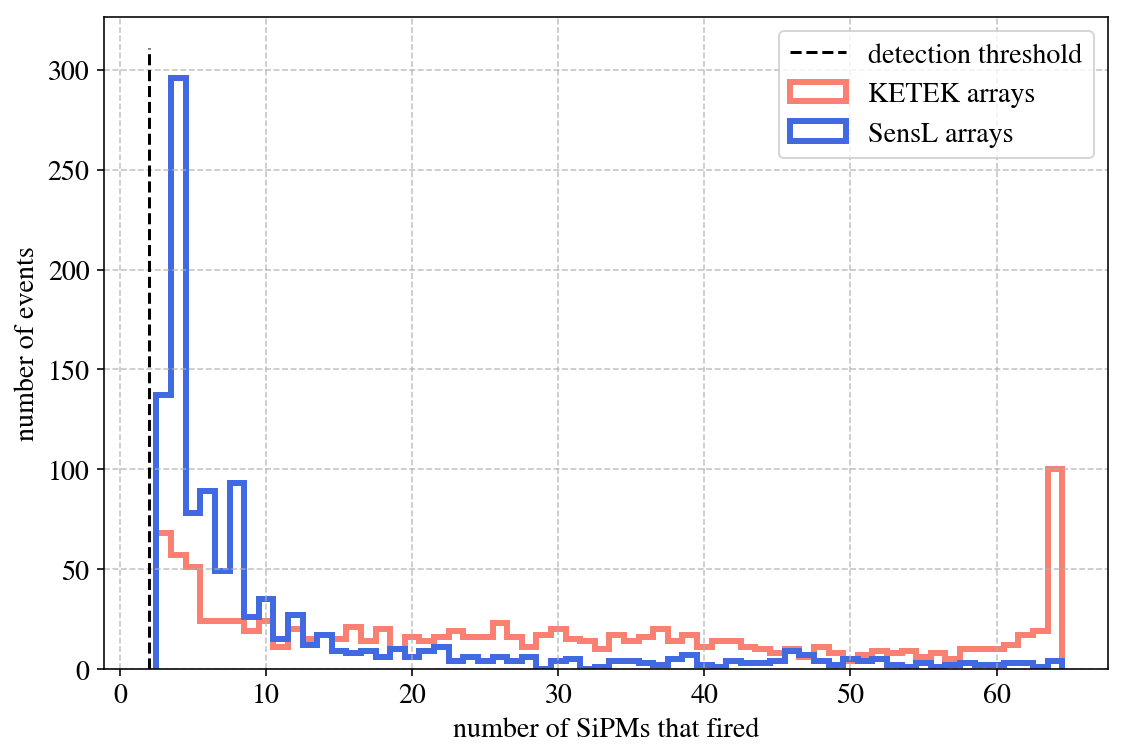

In [16]:
fig,ax=plt.subplots(figsize=(9,6))
plot_discrete_histogram(KETEK_events['N(SiPMs)'],label='KETEK arrays',color='salmon')
plot_discrete_histogram(SensL_events['N(SiPMs)'],label='SensL arrays',color='royalblue')
plt.plot([2,2],ax.get_ylim(),'--k',label='detection threshold')
set_axes(ax,x_label='number of SiPMs that fired',y_label='number of events',
         do_add_grid=True,do_add_legend=True,fontsize=14);

In [28]:
KETEK_Edep,Edep_err = ADC_2_Edep_approximately(KETEK_events['Qtot'],ScintillatorAreaCoverage=0.25)
SensL_Edep,Edep_err = ADC_2_Edep_approximately(SensL_events['Qtot'])

Qbins = np.linspace(0,30,61) # MeV
hKETEK,edges=np.histogram(KETEK_Edep,bins=Qbins); centers=(edges[1:]+edges[:-1])/2
hSensL,edges=np.histogram(SensL_Edep,bins=Qbins); centers=(edges[1:]+edges[:-1])/2

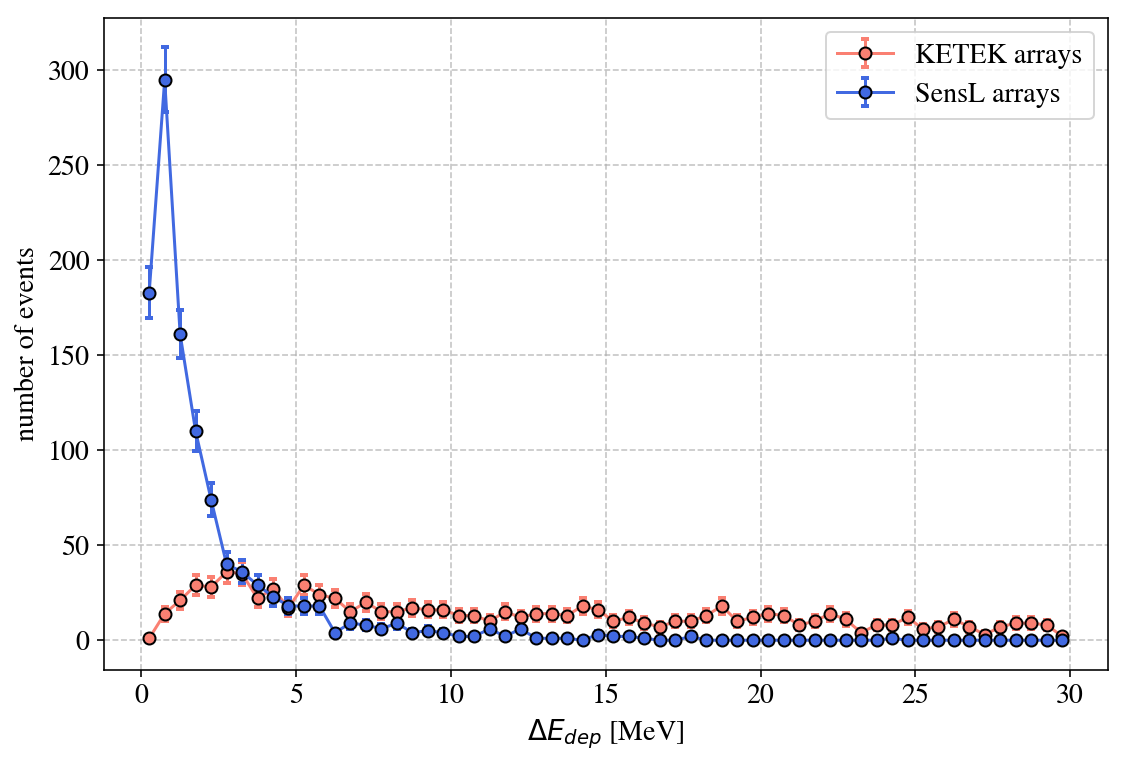

In [29]:
fig,ax=plt.subplots(figsize=(9,6))

plt.errorbar(centers,hKETEK,np.sqrt(hKETEK),marker='o',markeredgecolor='k',label='KETEK arrays',color='salmon',capthick=2,capsize=2)
plt.errorbar(centers,hSensL,np.sqrt(hSensL),marker='o',markeredgecolor='k',label='SensL arrays',color='royalblue',capthick=2,capsize=2)
set_axes(ax,x_label='$\Delta E_{dep}$ [MeV]',y_label='number of events',
         do_add_grid=True,do_add_legend=True,fontsize=14);